In [1]:
import tensorflow as tf
from tensorflow import keras
(train_image,train_label),(test_image,test_label)=keras.datasets.mnist.load_data()

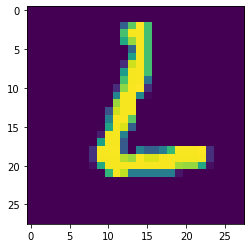

In [3]:
import matplotlib.pyplot as plt
import random 
ch=random.choice(range(len(train_image)))
%matplotlib inline
plt.imshow(train_image[ch])

In [2]:
tf.executing_eagerly()

True

In [4]:
train_images=tf.expand_dims(train_image,-1)
test_images=tf.expand_dims(test_image,-1)
test_images.shape


TensorShape([10000, 28, 28, 1])

In [5]:
train_images=tf.cast(train_images/255,tf.float32)
train_images.shape

TensorShape([60000, 28, 28, 1])

In [6]:
train_label=tf.cast(train_label,tf.int64)

In [7]:
train_data=tf.data.Dataset.from_tensor_slices((train_images,train_label))
train_data


<TensorSliceDataset shapes: ((28, 28, 1), ()), types: (tf.float32, tf.int64)>

In [ ]:
features,label=next(iter(train_data))

In [8]:
BATCH_SIZE=32
train_data=train_data.shuffle(10000).batch(BATCH_SIZE).repeat()

In [9]:
features,label=next(iter(train_data))
label

<tf.Tensor: shape=(32,), dtype=int64, numpy=
array([7, 6, 8, 2, 3, 6, 3, 7, 3, 9, 2, 1, 6, 0, 8, 3, 3, 4, 3, 8, 6, 5,
       2, 4, 1, 1, 0, 4, 8, 5, 2, 9], dtype=int64)>

In [34]:
model=tf.keras.Sequential()
model.add(keras.layers.Conv2D(16,(3,3),input_shape=(28,28,1),activation='relu'))
model.add(keras.layers.Conv2D(32,(3,3),activation='relu'))
model.add(keras.layers.GlobalAveragePooling2D())
model.add(keras.layers.Dense(10))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 26, 26, 16)        160       
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 24, 24, 32)        4640      
_________________________________________________________________
global_average_pooling2d_1 ( (None, 32)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                330       
Total params: 5,130
Trainable params: 5,130
Non-trainable params: 0
_________________________________________________________________


In [35]:
optimizer=keras.optimizers.Adam()
loss_func=keras.losses.SparseCategoricalCrossentropy(from_logits=True)#大写的是可以直接调用的方法




In [36]:
features,label=next(iter(train_data))
features.shape#每一批次的数据为三十二个

TensorShape([32, 28, 28, 1])

In [37]:
prediction=model(features)
prediction.shape

TensorShape([32, 10])

In [38]:
tf.argmax(prediction, axis=1)


<tf.Tensor: shape=(32,), dtype=int64, numpy=
array([5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5], dtype=int64)>

In [43]:
train_loss=tf.keras.metrics.Mean('train_loss')
train_accuracy=keras.metrics.SparseCategoricalAccuracy('train_accuracy')

In [44]:
def loss(model,x,y):
    y_=model(x)
    return loss_func(y,y_)
def train_step(model,image,label):
    with tf.GradientTape() as t:
         y_=model(x)
         loss_func(y,y_)
    grad=t.gradient(loss_1,model.trainable_variables)
    optimizer.apply_gradients(zip(grad,model.trainable_variables))
    train_loss(loss_1)
    train_accuracy(y,y_)
#自定义每一步模型的训练方法

In [47]:
def train():
    for epoch in range(10):
        for(batch,(images,labels)) in enumerate(train_data):
            train_step(model,images,labels)
        print('Epoch{} loss is {}, accuracy is {}'.format(epoch,
                                                          train_loss.result(),
                                                          train_accuracy.result()))
        train_loss=train_loss.reset_states()
        train_accuracy=train_accuracy.reset_states()

In [ ]:
import tensorflow as tf
from tensorflow import keras
(train_image,train_label),(test_image,test_label)=keras.datasets.mnist.load_data()#导入数据
train_images=tf.expand_dims(train_image,-1)#扩展维度
train_images=tf.cast(train_images/255,tf.float32)#归一化处理数据，然后转化数据格式
train_label=tf.cast(train_label,tf.int64)#处理标签数据
train_data=tf.data.Dataset.from_tensor_slices((train_images,train_label))#制作数据
BATCH_SIZE=32
train_data=train_data.shuffle(10000).batch(BATCH_SIZE).repeat()
model=tf.keras.Sequential()
model.add(keras.layers.Conv2D(16,(3,3),input_shape=(28,28,1),activation='relu'))
model.add(keras.layers.Conv2D(32,(3,3),activation='relu'))
model.add(keras.layers.GlobalAveragePooling2D())
model.add(keras.layers.Dense(10))
#创建模型
optimizer=keras.optimizers.Adam()
loss_func=keras.losses.SparseCategoricalCrossentropy(from_logits=True)#大写的是可以直接调用的方法
def loss(model,x,y):
    y_=model(x)
    return loss_func(y,y_)
def train_step(model,image,label):
    with tf.GradientTape() as t:
        loss_1=loss(model,image,label)
    grad=t.gradient(loss_1,model.trainable_variables)
    optimizer.apply_gradients(zip(grad,model.trainable_variables))
def train():
    for epoch in range(5):
        for(batch,(images,labels)) in enumerate(train_data):
            train_step(model,images,labels)
        print("epoch{} is finished".format(batch))


In [10]:
#metrics汇总模块
model=tf.keras.models.load_model('useeager.h5')
prediction=model(features)
tf.argmax(prediction, axis=1)

<tf.Tensor: shape=(32,), dtype=int64, numpy=
array([7, 6, 8, 8, 3, 6, 3, 7, 3, 9, 2, 1, 6, 0, 8, 3, 3, 4, 3, 8, 6, 5,
       2, 4, 1, 1, 0, 4, 8, 5, 2, 9], dtype=int64)>

In [11]:
label

<tf.Tensor: shape=(32,), dtype=int64, numpy=
array([7, 6, 8, 2, 3, 6, 3, 7, 3, 9, 2, 1, 6, 0, 8, 3, 3, 4, 3, 8, 6, 5,
       2, 4, 1, 1, 0, 4, 8, 5, 2, 9], dtype=int64)>